In [1]:
import numpy as np
from pandas_datareader import data as wb
import math as m
import matplotlib.pyplot as plt
from scipy.stats import norm
import pyfeng as pf

In [2]:
 PG = wb.DataReader(name = 'PG',data_source = 'yahoo',start = '2021-1-1',end = '2021-12-31')

In [3]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,139.860001,136.350006,139.660004,137.820007,8330900.0,132.112946
2021-01-05,138.919998,136.270004,137.990005,138.699997,6856400.0,132.956512
2021-01-06,141.039993,138.600006,138.770004,140.160004,10578000.0,134.356033
2021-01-07,140.130005,138.039993,139.750000,138.850006,7355400.0,133.100281
2021-01-08,139.059998,137.000000,138.470001,138.789993,7448500.0,133.042755


# Implied Volatility

In [4]:
def imps_sig(S, K, T, C, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #C: Call value
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    fx = S * norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * norm.cdf(d2, 0.0, 1.0) - C
    
    vega = (1 / np.sqrt(2 * np.pi)) * S * np.sqrt(T) * np.exp(-(norm.cdf(d1, 0.0, 1.0) ** 2) * 0.5)
    
    tolerance = 0.000001
    x0 = sigma
    xnew  = x0
    xold = x0 - 1
        
    while abs(xnew - xold) > tolerance:
    
        xold = xnew
        xnew = (xnew - fx - C) / vega
        
        return abs(xnew)

In [5]:
imps_sig(25, 20, 1, 7, 0.05, 0.25)

0.671115789259015

In [6]:
# Real World P

In [7]:
PG['Indicator'] = PG['Adj Close']-PG['Adj Close'].shift(1)
C = PG['Indicator']
Up_mov = C[C>0].count()
P1 = Up_mov/PG['Indicator'].count()
P1 = round(P1,4) 
Q = 1-P1
P1

0.5697

# Historical Volatility

In [8]:
PG['log returns'] = np.log(PG['Adj Close']/PG['Adj Close'].shift())
sigma = PG['log returns'].std()*252**0.5
sigma


0.14421028651939294

# Moment Matching

2.3 % treasury bill rate for 1 year (USA Govt.)

In [9]:
# P with the Historical volatility
E=10
S0=20
r=.233
sig=sigma
T=1
M=20
dt = T/M
A= 0.5 * (m.exp(r + sig**2)*dt + m.exp(r*dt))
u = A + m.sqrt(A**(2 -1))
d = A - m.sqrt(A**(2 -1))
P2 = (m.exp(r* dt) - d)/(u-d)
P2

0.8228426115560851

In [10]:
# P with the Implied volatility
E=10
S0=20
r=.233
sig=imps_sig(25, 20, 1, 7, 0.05, 0.25)
T=1
M=20
dt = T/M
A= 0.5 * (m.exp(r + sig**2)*dt + m.exp(r*dt))
u = A + m.sqrt(A**(2 -1))
d = A - m.sqrt(A**(2 -1))
P3 = (m.exp(r* dt) - d)/(u-d)
P3

0.8061750800160079

#Cox Ross Robenstein

In [11]:
# P with the Historical volatility
u = m.exp(sigma * dt**0.5)
d = m.exp(-(sigma * dt**0.5))

P4 = (m.exp(r* dt) - d)/(u-d)
P4


0.6736042586621348

In [12]:
# P with the Implied volatility

In [13]:
sig  = imps_sig(25, 20, 1, 7, 0.05, 0.25)
u = m.exp(sig * dt**0.5)
d = m.exp(-(sig * dt**0.5))

P5 = (m.exp(r* dt) - d)/(u-d)
P5


0.5014508029154304

In [18]:
Abhi = []
Sharma = [1,2,3,4,5]
Abhi.extend([P1,P2,P3,P4,P5])
print(Abhi)

[0.5697, 0.8228426115560851, 0.8061750800160079, 0.6736042586621348, 0.5014508029154304]


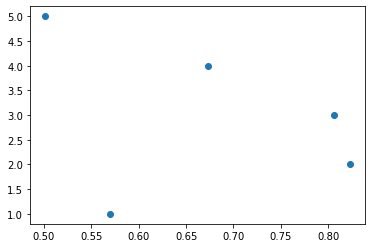

In [24]:
plt.scatter(Abhi,Sharma)
